## Using Sequential API


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
    

### Import Dataset

In [3]:
from sklearn.datasets import fetch_california_housing


In [4]:
housing=fetch_california_housing()

In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Training Dataset

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
X_train_full.shape

(15480, 8)

### Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler= StandardScaler()
X_train =scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [14]:
# to get random values from the dataset

np.random.seed(42)
tf.random.set_seed(42)

In [15]:
X_train.shape

(11610, 8)

### Model Layers

In [16]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [18]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
model_history=model.fit(X_train,y_train,epochs=20,
                       validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [20]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3993 - mae: 0.4595


In [21]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549983620643616,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563967704773,
  0.5010153651237488,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595836639404,
  0.5779173374176025,
  0.55718696117

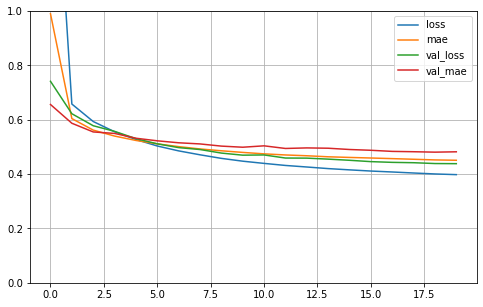

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
X_new=X_test[:3]

In [24]:
y_pred=model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 236ms/step
[[0.48965693]
 [1.9347274 ]
 [3.6413553 ]]


In [25]:
print(y_test[:3])

[0.477   0.458   5.00001]


## Using Functional API

In [26]:
del model  # deleting Previous Model

In [27]:
keras.backend.clear_session()

### Creating Layers

In [29]:
input_ =keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)

In [30]:
model= keras.models.Model(inputs=[input_],outputs=[output])


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

### Compiling Model

In [33]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
model_history=model.fit(X_train,y_train,epochs=40,
                       validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3965 - mae: 0.4517 - val_loss: 0.4344 - val_mae: 0.4804
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3929 - mae: 0.4498 - val_loss: 0.4411 - val_mae: 0.4881
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3918 - mae: 0.4489 - val_loss: 0.4333 - val_mae: 0.4798
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3875 - mae: 0.4463 - val_loss: 0.4356 - val_mae: 0.4851
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3861 - mae: 0.4448 - val_loss: 0.4297 - val_mae: 0.4778
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3830 - mae: 0.4436 - val_loss: 0.4320 - val_mae: 0.4770
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3830 - mae: 0.4423 - val_loss: 0.4293 - val_mae: 0.4779
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [39]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3727 - mae: 0.4390


In [40]:
model_history.history

{'loss': [0.3964621126651764,
  0.3929463326931,
  0.39184334874153137,
  0.38750550150871277,
  0.38608622550964355,
  0.3830401599407196,
  0.3830115497112274,
  0.3800896108150482,
  0.37808486819267273,
  0.3765818774700165,
  0.37551990151405334,
  0.37410417199134827,
  0.3756759762763977,
  0.3715985119342804,
  0.3703954815864563,
  0.36876699328422546,
  0.36719346046447754,
  0.3673640489578247,
  0.3652487099170685,
  0.3644741475582123,
  0.3641212582588196,
  0.3623307943344116,
  0.36242443323135376,
  0.3616354763507843,
  0.36204060912132263,
  0.35870054364204407,
  0.35947611927986145,
  0.3587113916873932,
  0.35984745621681213,
  0.35741010308265686,
  0.3612877428531647,
  0.35651302337646484,
  0.3576534390449524,
  0.35472673177719116,
  0.3547639548778534,
  0.35158857703208923,
  0.3511583209037781,
  0.3505183756351471,
  0.3495592772960663,
  0.34885871410369873],
 'mae': [0.4516594707965851,
  0.44976505637168884,
  0.4488804042339325,
  0.44625869393348694,

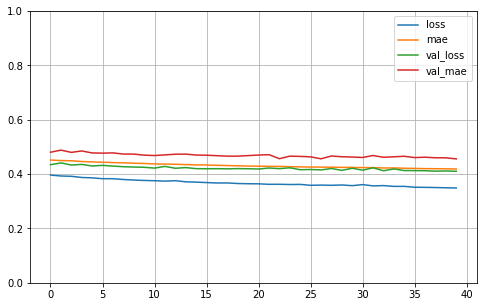

In [41]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Saving & Restoring Model

In [42]:
model.save("ann_regression_model.h5")

In [43]:
%pwd #present working directory 

'c:\\Users\\Rohit\\OneDrive\\Documents\\GitHub\\Deep-Learning\\ANN'

In [44]:
del model

In [45]:
keras.backend.clear_session()

In [47]:
### Restoring Model

model=keras.models.load_model("ann_regression_model.h5")

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']            

In [49]:
y_pred =model.predict(X_new)
y_pred

1/1 [==============================] - 0s 72ms/step


array([[0.75884366],
       [1.7320397 ],
       [4.6950564 ]], dtype=float32)

### Using Callbacks during Training

In [50]:
keras.backend.clear_session()

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [55]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              )

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### Creating Callbacks for Epoch

*Callbacks allow you to save a model while training AFTER each epoch*

In [56]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [57]:
history=model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4696

*Here We observe 10 models for each epoch*

In [58]:
del model
keras.backend.clear_session()

In [59]:
model=keras.models.load_model("Model-05.h5") # we can use requried model 


In [60]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4984


#### Saving Best Model Only

In [61]:
del model
keras.backend.clear_session()

In [62]:
model= keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [63]:
model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              )

c:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [65]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [66]:
history=model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.4581 - val_loss: 0.8261
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7368 - val_loss: 0.6971
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6516 - val_loss: 0.6317
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5943
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5578
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5199 - val_loss: 0.5338
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4940 - val_loss: 0.5146
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4992
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4867
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4431 - val_loss: 0.4755

In [67]:
model=keras.models.load_model("Best_Model.h5")
mse_test=model.evaluate(X_test,y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.4305
